In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


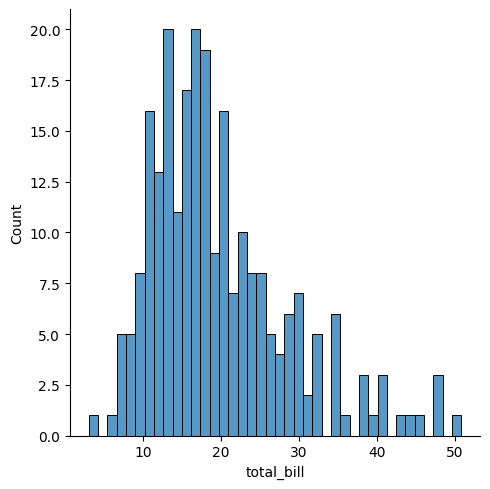

In [4]:
# sns.displot(tips['total_bill'],kde = True) #kde is a histogram graph, it is set as false by default, kde = kernel density estimation
sns.displot(tips['total_bill'], bins = 40) #binsize should not be too high, it should depend upon the size of the data and its readability on graph

In [5]:
# sns.jointplot(x ='total_bill', y='tip', data = tips) 
# jointplot allows us to combine two distplots and it is bivariate in nature, therefore it allows us to combine 2 distplot graphs together.
# scatter plot shows as you go higher in bill you go higher in tip

# sns.jointplot(x ='total_bill', y='tip', data = tips, kind ='hex')
# hex graph is lighter where the scatter values are low and darker where scatter values are high

# sns.jointplot(x ='total_bill', y='tip', data = tips, kind = 'hist') 
# hist makes pixel graph, darker or lighter shade indicates the intensity of scatter dots

# sns.jointplot(x ='total_bill', y='tip', data = tips, kind = 'resid') 
# has both negative and positive in both x and y axes in the scatter graph

# sns.jointplot(x ='total_bill', y='tip', data = tips, kind = 'reg')
# regression lines, final regression line with least intercept and scatter graph

# sns.jointplot(x ='total_bill', y='tip', data = tips, kind = 'kde') 
# histogram graph banata hai, looks cool

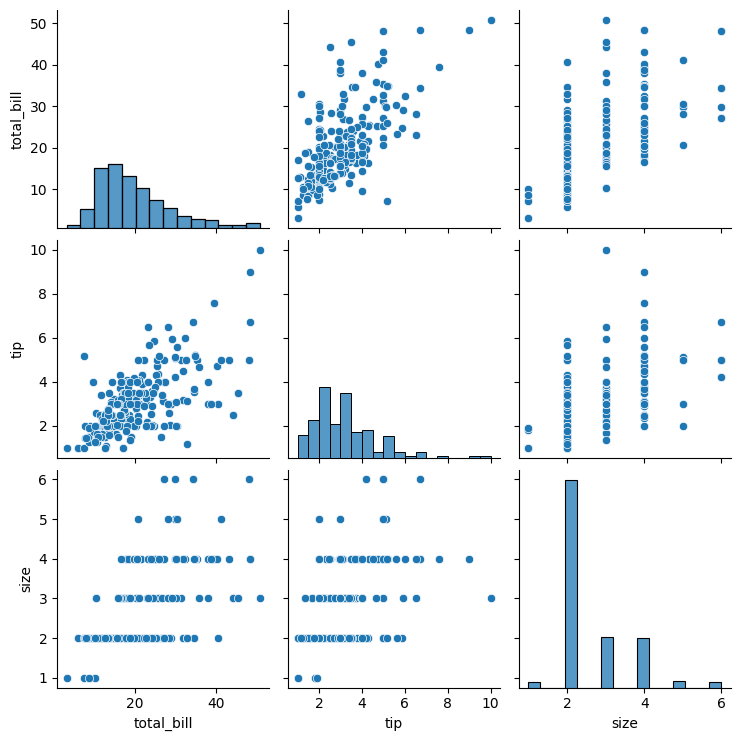

In [6]:
sns.pairplot(tips)
# plots pairwise relationships accross a dataframe
# plots relationships of all colums in the dataframe (numeric values)

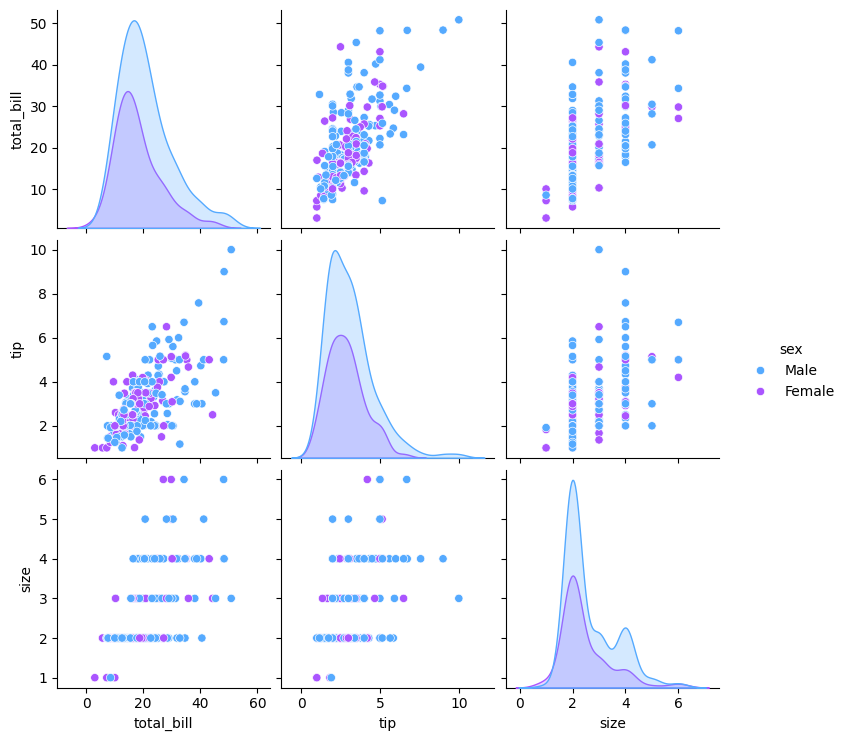

In [7]:
sns.pairplot(tips, hue = 'sex', palette ='cool')
# palette lets us use color palettes
#hue lets us insert categorical columns from the dataframe and it shows the types in graph using two diff colors, with built in legend

<Axes: xlabel='total_bill'>

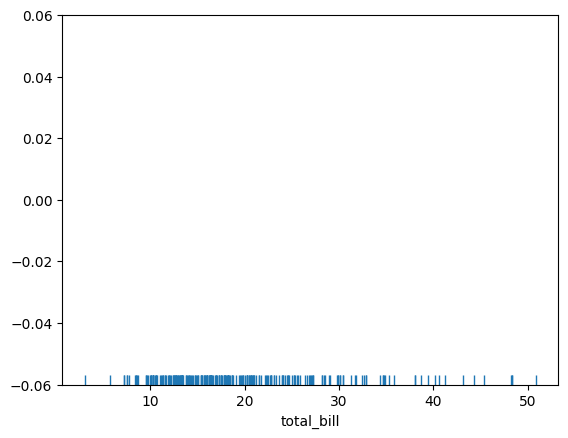

In [8]:
sns.rugplot(tips['total_bill'])
# univariate distribution, more rugs/dashes = higher intensity 
# similar to that of histogram

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

(0.0, 1.0)

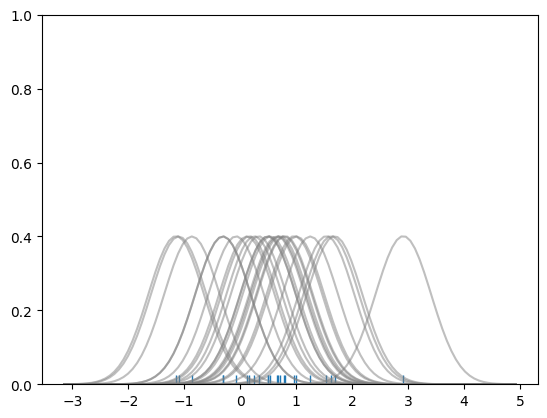

In [13]:
#create datset
dataset = np.random.randn(25)
#create rugplot
sns.rugplot(dataset)

#setting up x axis for the plot
x_min = dataset.min()-2
x_max = dataset.max()+2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

#setting up badnwidth
url = 'https://en.wikipedia.org/wiki/Kernel_density_estimationPractical_estimation_of_the_bandwidth'
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

#create empty kernel list
kernel_list = []
#plot each basis func
for data_point in dataset:
    
    #create a kernel for each point and append to list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel/ kernel.max()
    kernel = kernel *.4
    plt.plot(x_axis,kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

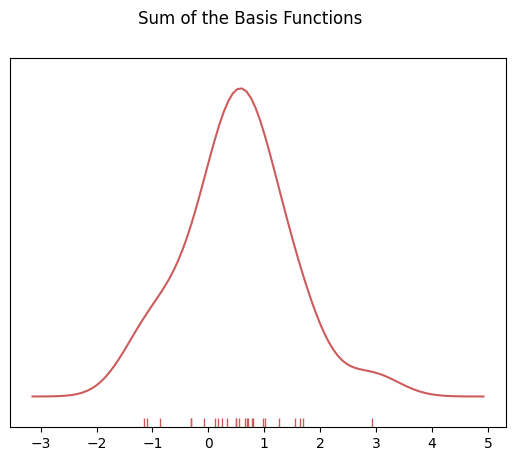

In [14]:
#plot the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)

#plot figure
fig = plt.plot(x_axis,sum_of_kde, c= 'indianred')

sns.rugplot(dataset, c = 'indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")